# Vessel Response - Data Analysis

Notebook responsible to explore vessel response data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import time

In [2]:
def get_nan_percentual(df):
    """
    This functions is responsible for calculating the percentual of missing data and print it for each column of a dataframe.
    
    args:
    
    df (pd.DataFrame) -> Data Set to be analized
    """
    missing_values = df.isna().mean()
    length_missing_values = len(missing_values)
    
    for ind in range(length_missing_values):
        
        print(f'{missing_values.index[ind]}:>> {missing_values[ind]}%')

In [3]:
base_path = 'data\\'
vessel_response_filename = 'vessel_response.csv'
vessel_response = pd.read_csv(''.join([base_path, vessel_response_filename]), parse_dates=['Unnamed: 0'])
vessel_response.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Descriptive analysis

In [4]:
vessel_response.describe().T

,count,mean,std,min,25%,50%,75%,max
Heave,8639887.0,0.000066,0.338110,-2.450799,-0.196175,-0.000042,0.196261,2.479998
Roll,8639887.0,-0.180243,0.963899,-5.120696,-0.542293,-0.069061,0.362399,3.772063
Pitch,8639887.0,-0.025679,0.548303,-4.098996,-0.358536,-0.016376,0.313709,4.027931


In [5]:
vessel_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639887 entries, 0 to 8639886
Data columns (total 4 columns):
 #   Column  Dtype              
---  ------  -----              
 0   Date    datetime64[ns, UTC]
 1   Heave   float64            
 2   Roll    float64            
 3   Pitch   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 263.7 MB


In [6]:
vessel_response.loc[:, ['Heave', 'Roll', 'Pitch']] = vessel_response.loc[:, ['Heave', 'Roll', 'Pitch']].astype('float32')

In [7]:
vessel_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639887 entries, 0 to 8639886
Data columns (total 4 columns):
 #   Column  Dtype              
---  ------  -----              
 0   Date    datetime64[ns, UTC]
 1   Heave   float32            
 2   Roll    float32            
 3   Pitch   float32            
dtypes: datetime64[ns, UTC](1), float32(3)
memory usage: 164.8 MB


__Conclusions:__

- These movements have oscillatory characteristics which can be seen in the summary of statistics. To confirm this, one option is to plot the behavior of each movement over time.

- All numerical data was read as `float64`, to use less memory, it is interesting to change the column type to a more economical float. In this case, changing to `float32` reduced memory usage from `263.7MB` to `164.8MB` (about `100MB`).

# Nan analysis

In [8]:
get_nan_percentual(vessel_response)

Date:>> 0.0%
Heave:>> 0.0%
Roll:>> 0.0%
Pitch:>> 0.0%


__Conclusions:__

There are no missing values.

# Dynamic Analysis

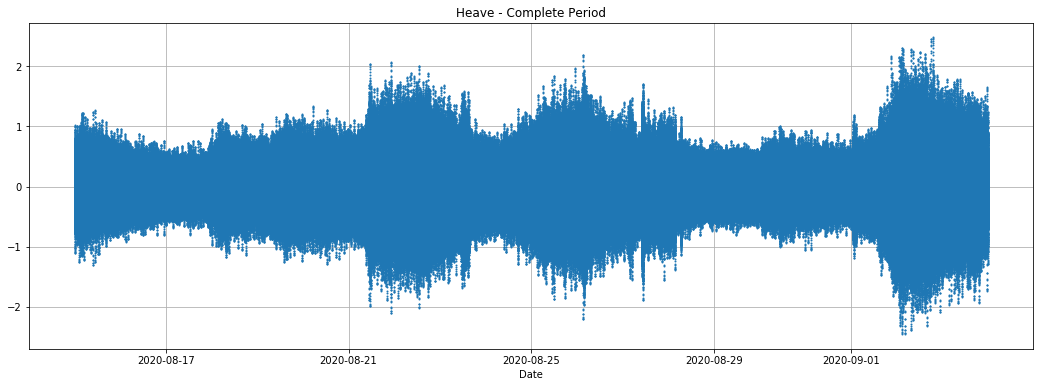

In [9]:
column = 'Heave'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(f'{column} - Complete Period')
plt.plot(vessel_response.set_index('Date')[column], 'o', ms = 1, )
plt.xlabel('Date')
plt.show()

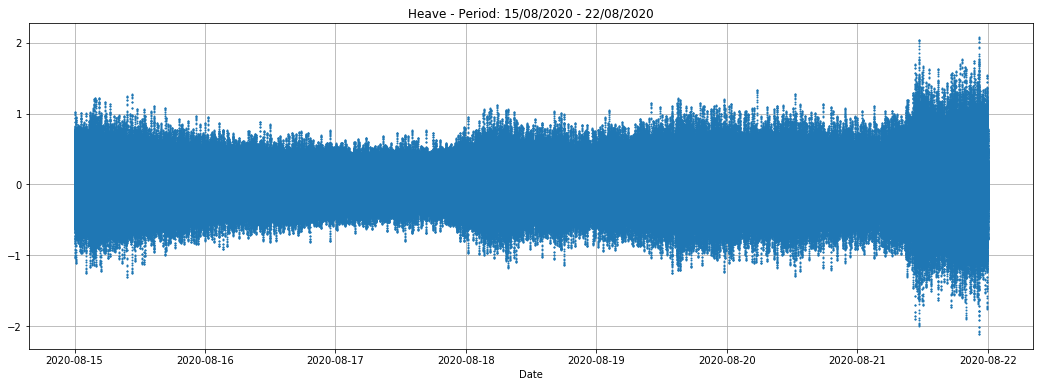

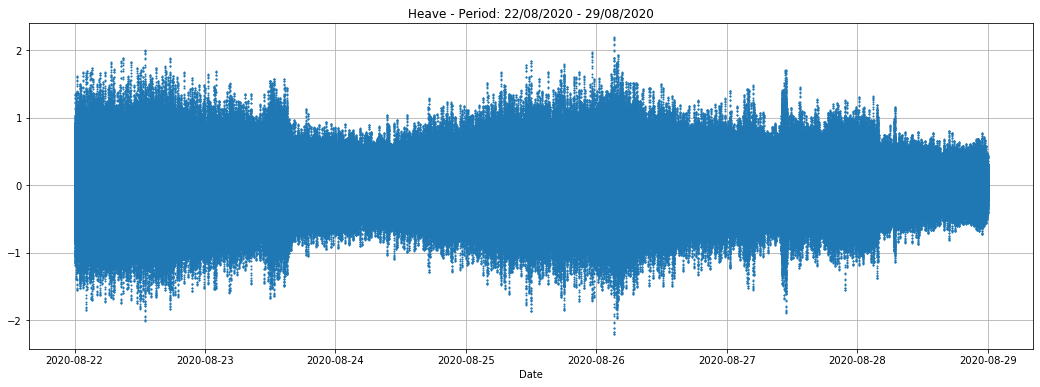

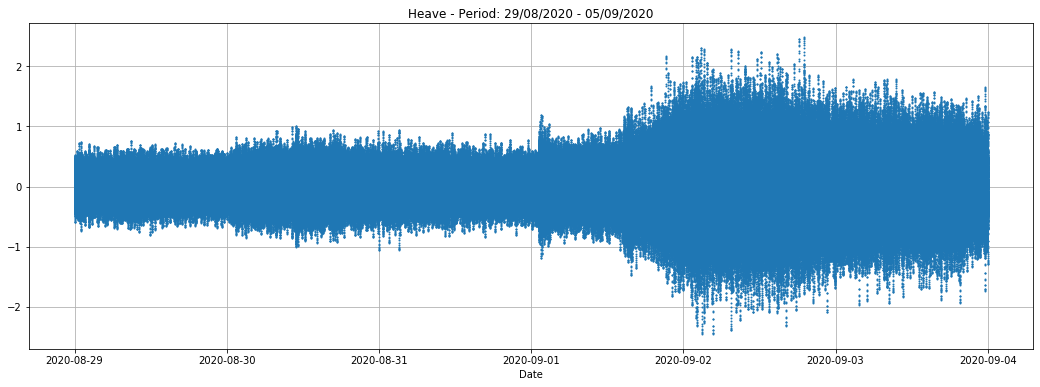

In [10]:
ini = pd.to_datetime('2020-08-15', utc='UTC')
time_step = 7
column = 'Heave'

while  ini < vessel_response.Date.max():
    
    end = ini + timedelta(days=time_step)
    data = vessel_response[(vessel_response.Date >= ini) & (vessel_response.Date<= end)]
    
    plt.figure(figsize = (18, 6))
    plt.grid()
    plt.title(f'{column} - Period: {ini.strftime("%d/%m/%Y")} - {end.strftime("%d/%m/%Y")}')
    plt.plot(data.set_index('Date')[column], 'o', ms = 1, )
    plt.xlabel('Date')
    plt.show()
    
    ini = end

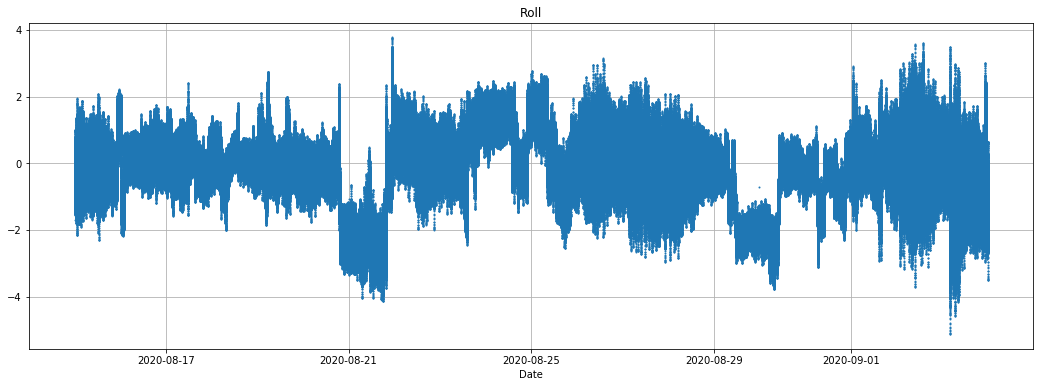

In [11]:
column = 'Roll'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(column)
plt.plot(vessel_response.set_index('Date')[column], 'o', ms = 1, )
plt.xlabel('Date')
plt.show()

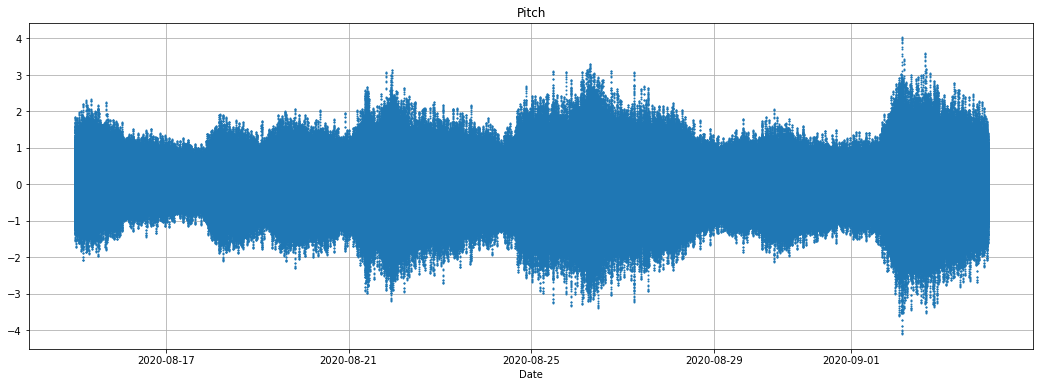

In [12]:
column = 'Pitch'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(column)
plt.plot(vessel_response.set_index('Date')[column], 'o', ms = 1, )
plt.xlabel('Date')
plt.show()

__Conclusions:__

It is difficult to observe the behavior due to the large amount of points. However, the oscillatory behavior of each variable is noted. Specifically in the roll response, there are some possible drifts, levels of value that are out of the general pattern.

# How to synchronize motion data with weather data 

As the vessel response has a high frequency measurement (with many points in an interval of a second). A strategy adopted was to resample the data considering the mean per second.
With that the data will decay from `8.639.887` entries to `1.728.000`. A question that must be answered is if there is any kind and lost in the information making this consideration.

In [13]:
vessel_response_agg_by_sec = vessel_response.set_index('Date').resample('S').mean()
vessel_response_agg_by_5sec = vessel_response.set_index('Date').resample('5S').mean()

In [14]:
vessel_response_agg_by_sec.head()

,Heave,Roll,Pitch
Date,,,
2020-08-15 00:00:00+00:00,-0.460648,-1.364725,-0.044143
2020-08-15 00:00:01+00:00,-0.495906,-1.064388,-0.239000
2020-08-15 00:00:02+00:00,-0.262876,-0.580920,-0.223428
2020-08-15 00:00:03+00:00,0.049354,-0.185133,-0.104570
2020-08-15 00:00:04+00:00,0.358442,0.258371,0.067386


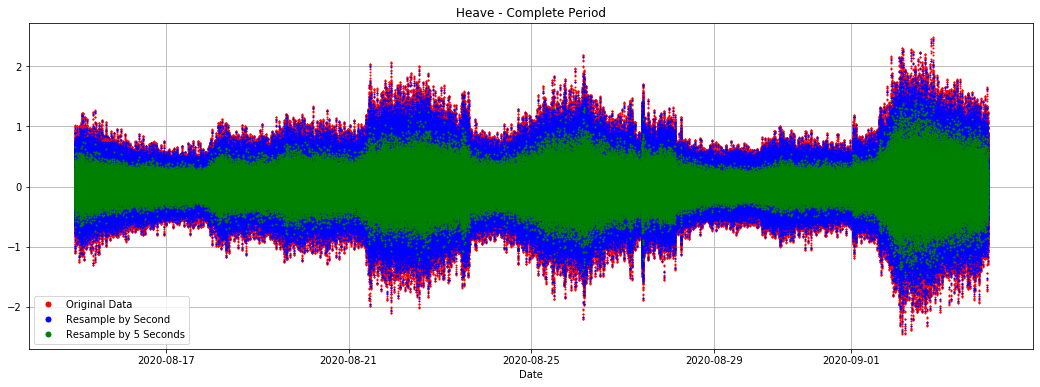

In [15]:
column = 'Heave'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(f'{column} - Complete Period')
plt.plot(vessel_response.set_index('Date')[column], 'o', ms=1, c='r', label='Original Data')
plt.plot(vessel_response_agg_by_sec[column], 'o', ms=1, c='b', label='Resample by Second')
plt.plot(vessel_response_agg_by_5sec[column], 'o', ms=1, c='g', label='Resample by 5 Seconds')
plt.xlabel('Date')
plt.legend(loc='lower left', markerscale=5)
plt.show()

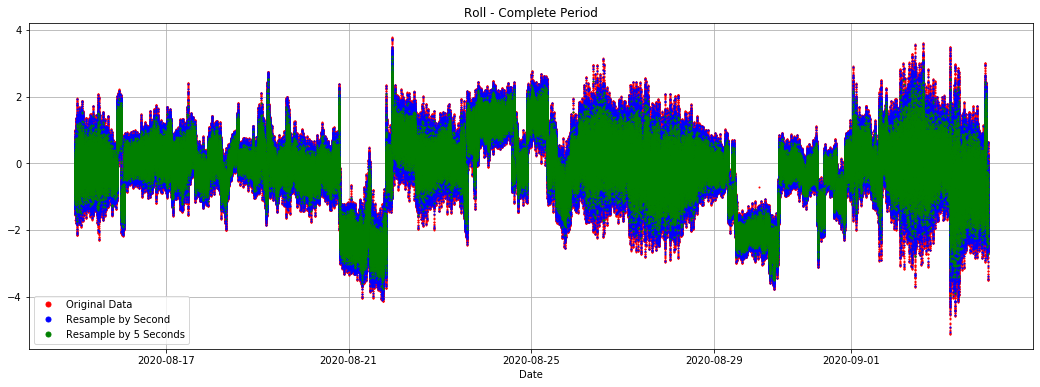

In [16]:
column = 'Roll'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(f'{column} - Complete Period')
plt.plot(vessel_response.set_index('Date')[column], 'o', ms=1, c='r', label='Original Data')
plt.plot(vessel_response_agg_by_sec[column], 'o', ms=1, c='b', label='Resample by Second')
plt.plot(vessel_response_agg_by_5sec[column], 'o', ms=1, c='g', label='Resample by 5 Seconds')
plt.xlabel('Date')
plt.legend(loc='lower left', markerscale=5)
plt.show()

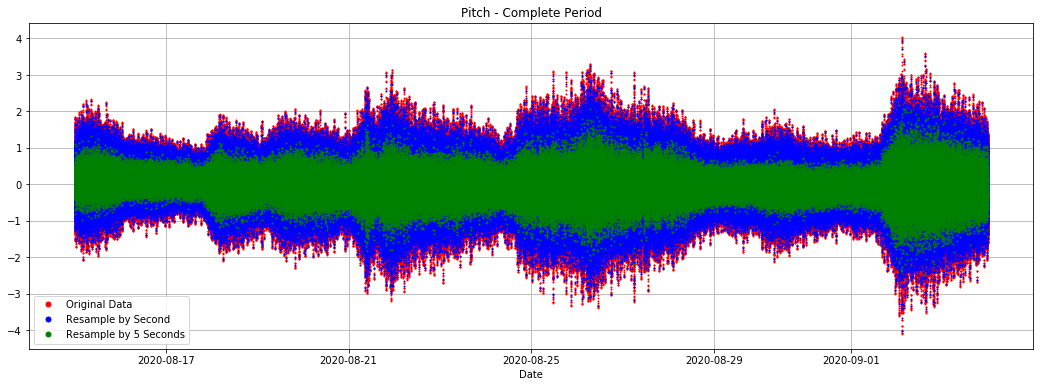

In [17]:
column = 'Pitch'
plt.figure(figsize = (18, 6))
plt.grid()
plt.title(f'{column} - Complete Period')
plt.plot(vessel_response.set_index('Date')[column], 'o', ms=1, c='r', label='Original Data')
plt.plot(vessel_response_agg_by_sec[column], 'o', ms=1, c='b', label='Resample by Second')
plt.plot(vessel_response_agg_by_5sec[column], 'o', ms=1, c='g', label='Resample by 5 Seconds')
plt.xlabel('Date')
plt.legend(loc='lower left', markerscale=5)
plt.show()

__Conclusion:__

As seen in the graphs, no major loss of information when considering the resample per second. Note that by increasing the resample interval to 5 seconds, there is a loss mainly in the range of motion. Because of this, for later analysis the resample will be maintained with an interval of 1 second.

# Dynamic Plots

In [18]:
def plt_dynamic(x, y, ax, color='b'):
    """
    This function is responsible to update the plot into a loop.
    
    args:
    x (list/iterable) - Iterable used to define horizontal axis.
    y (list/iterable) - Iterable used to define vertical axis.
    ax (matplotlib.axes._subplots.AxesSubplot) - Axis used to plot.
    color (str) - Color used to define the plot.
    """

    ax.plot(x, y, color)
    fig.canvas.draw()

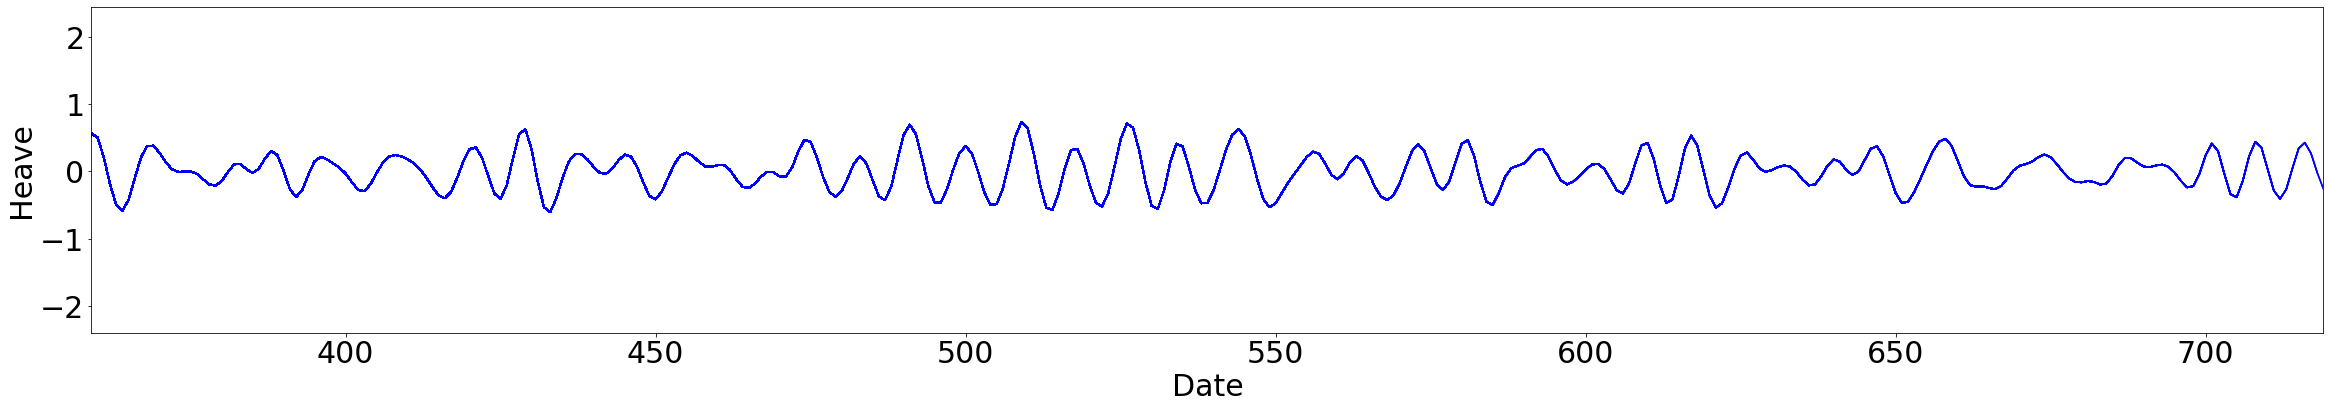

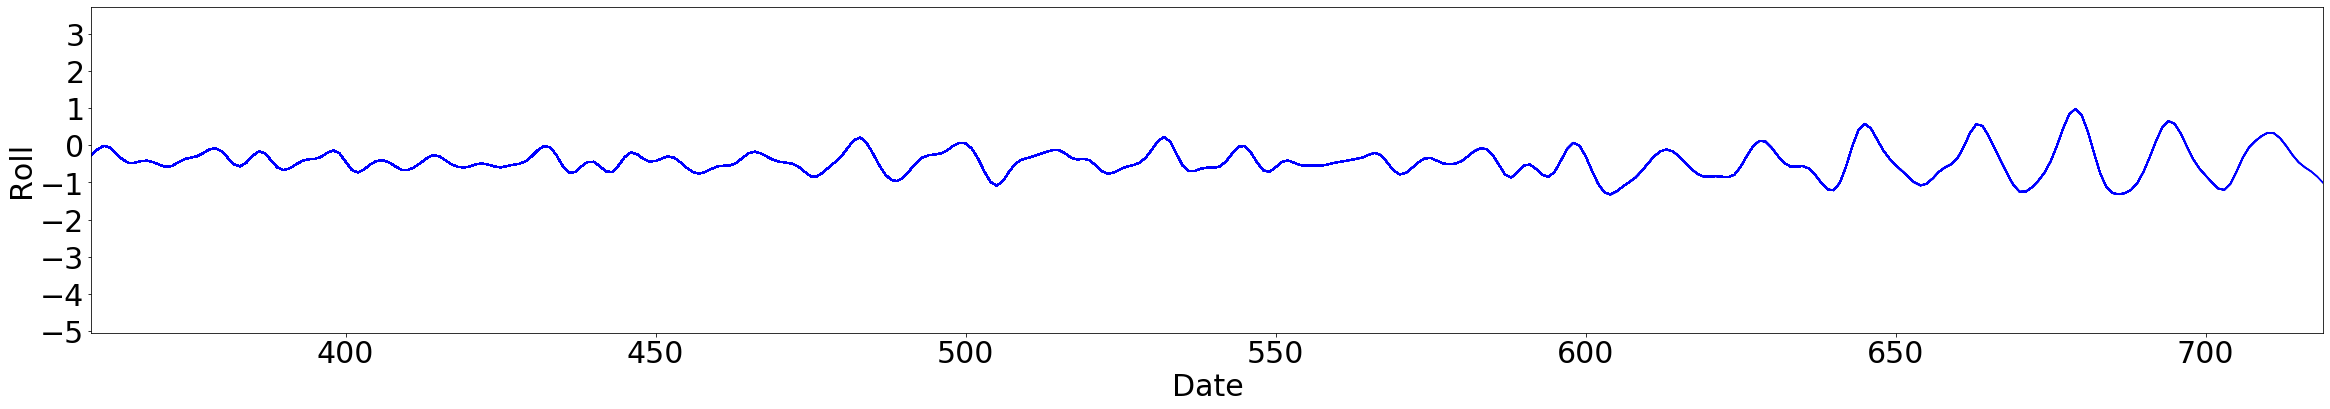

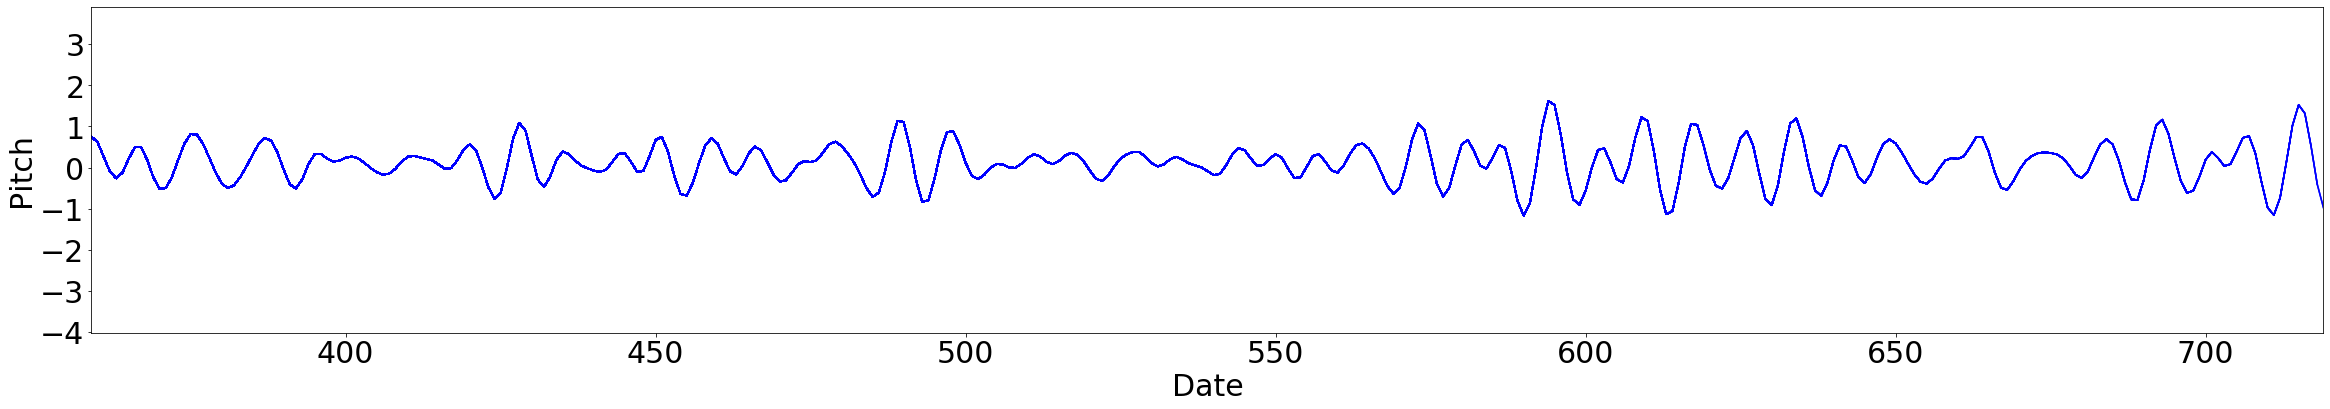

In [19]:
for column in vessel_response_agg_by_sec.columns:

    plt.rcParams['font.size'] = 30
    fig, ax = plt.subplots(1,1, figsize=(40, 6))

    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    ax.set_ylim(vessel_response_agg_by_sec[column].min(),
                vessel_response_agg_by_sec[column].max())
    ax.set_xlim(0,360)
    xs, ys = [], []
    i = 1
    # this is any loop for which you want to plot dynamic updates.
    # in my case, I'm plotting loss functions for neural nets
    for x in range(720):
        y = vessel_response_agg_by_sec[column][x]
        xs.append(x)
        ys.append(y)
        plt_dynamic(xs, ys, ax)
        #time.sleep(.1)

        if x > 360:
            ax.set_xlim(i,i + 360)
            i += 1
            #time.sleep(.1)

    plt_dynamic(xs, ys, ax)
    plt.rcParams['font.size'] = 10

# Save new dataset - Considering resample with 1 second of interval.

In [20]:
new_filename = 'vessel_response_agg_by_second.csv'
vessel_response_agg_by_sec.to_csv(''.join([base_path, new_filename]))